In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 14

In [2]:
### ACCEPTANCE ANGLE

#values measured
H = 193.5 #cm for the angle variation
#H = 17.0 #cm #for the absorption exp
W = 15.2 #cm
L = 30.0 #cm

dim_err = 0.05

theta = 2*np.arctan(W/H)
phi = 2*np.arctan(L/H)

theta_err = 2/np.sqrt(1+(W/H)*(W/H))*dim_err/H
phi_err = 2/np.sqrt(1+(L/H)*(L/H))*dim_err/H

print(f'theta = {theta:.4f} +- {theta_err:.4f} radians')
print(f'phi = {phi:.4f} +- {phi_err:.4f} radians')

#solid angle
Omega = 4*np.arcsin(np.sin(theta/2)*np.sin(phi/2))
Omega_err = 2/np.sqrt(1-np.sin(theta/2)**2*np.sin(phi/2)**2)*np.sqrt((np.sin(phi/2)*np.cos(theta/2)*theta_err)**2+
                                                                     (np.sin(theta/2)*np.cos(phi/2)*phi_err)**2)

print(f'Omega = {Omega:.4f} +- {Omega_err:.4f} steradians')


theta = 0.1568 +- 0.0005 radians
phi = 0.3076 +- 0.0005 radians
Omega = 0.0480 +- 0.0002 steradians


In [11]:
#ANGLE VARIANCE

#data
angle = np.array([0.0, np.pi/6, np.pi/4, np.pi/3, np.pi/2]) #rad
time = np.array([3300.268, 3348.172, 3630, 6030.450, 583500]) #s
counts = np.array([147,136,100,81,695])

time_err = np.array([0.001,0.001,10,0.001,60])
counts_err = np.sqrt(counts)
angle_err = theta/2+theta_err

#flux
rate = counts/time
rate_err = rate*np.sqrt((counts_err/counts)**2+(time_err/time)**2)
flux = rate/(W*L)
flux_err = flux*np.sqrt((dim_err/W)**2+(dim_err/L)**2+(rate_err/rate)**2)

#Approximation
def f(x, a,b,n): #function to approximate
    y = a*(np.cos(x)**n)+b
    return y

popt, pcov = curve_fit(f,angle,flux, bounds=(-0.1, np.pi/2+0.1), sigma=flux_err)
angle_fit = np.linspace(0,np.pi/2)
fit = f(angle_fit, *popt)
n_fitted = popt[-1]
a_err,b_err, n_err = np.sqrt(np.diag(pcov))

chi2 = np.sum((flux-f(angle, *popt))**2/f(angle, *popt))
print(f'Chi^2 value = {chi2:0.2e}')

Chi^2 value = 1.77e-06


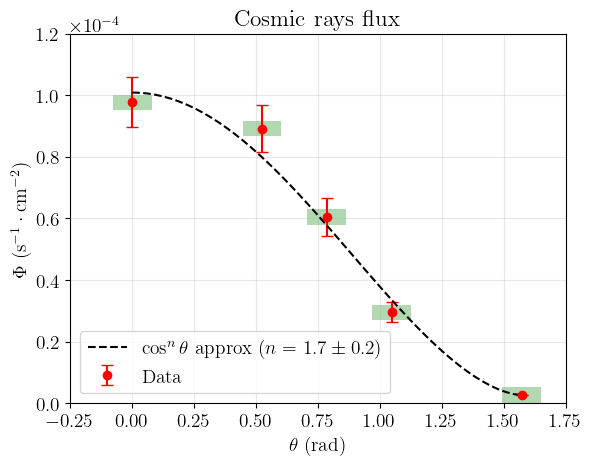

In [ ]:
#Figure varying the angle
fig, ax = plt.subplots()

ax.barh(flux, theta, left=angle-theta/2,height=5e-6, color='g', alpha=0.3)
ax.errorbar(angle, flux, flux_err, color='r', fmt='o', capsize=4, label='Data')
ax.plot(angle_fit,fit, color='k', linestyle='--', label=rf'$\cos^n{{\theta}}$ approx $(n = {n_fitted:0.1f} \pm {n_err:0.1f})$')
ax.set_xlim([-0.25,1.75])
ax.set_ylim([0,1.2e-4])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel(r'$\theta$ (rad)')
ax.set_ylabel(r'$\Phi \ \mathrm{(s^{-1} \cdot cm^{-2})}$ ')
ax.set_title('Cosmic rays flux')
ax.grid(alpha=0.3)
ax.legend()

fig.savefig('../Images/Scintillator_CosmicRaysFlux.pdf')